Based on the tutorial from https://muon-tutorials.readthedocs.io/en/latest/single-cell-rna-atac/brain3k/1-Processing-and-Integration.html

In [ ]:
!pip install pysam

In [1]:
!pip install "git+https://github.com/keller-mark/mofapy2@keller-mark-patch-1" --force-reinstall --no-deps

  Cloning https://github.com/keller-mark/mofapy2 (to revision keller-mark-patch-1) to /private/var/folders/36/83j6x3ln225bvbpk1_vdzrm00000gn/T/pip-req-build-cicp4ij2
  Running command git clone --filter=blob:none --quiet https://github.com/keller-mark/mofapy2 /private/var/folders/36/83j6x3ln225bvbpk1_vdzrm00000gn/T/pip-req-build-cicp4ij2
  Running command git checkout -b keller-mark-patch-1 --track origin/keller-mark-patch-1
  Switched to a new branch 'keller-mark-patch-1'
  branch 'keller-mark-patch-1' set up to track 'origin/keller-mark-patch-1'.
  Resolved https://github.com/keller-mark/mofapy2 to commit 66db6cbed16eb2b7f5fb13dbb45ae079b72a8201
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mofapy2: filename=mofapy2-0.7.0-py3-none-any.whl size=1003386 sha256=07004f5b88f38e99d59e8b77a14245849775dc055c904fecf9f87496f0e6d7bf
  Stored in directory: /private/var/folders/36/83j6x3ln

In [1]:
import mudatasets as mds

In [2]:
import scipy.io
import pandas as pd
import numpy as np
from anndata import AnnData
from mudata import MuData
import scanpy as sc
import muon as mu
from muon import atac as ac
from os.path import join
import os
from vitessce.data_utils import (
    VAR_CHUNK_SIZE,
    optimize_adata,
    adata_to_multivec_zarr,
)

/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/mkeller/sof

In [3]:
!pwd

/Users/mkeller/research/dbmi/vitessce/paper-figures/multiome/src


In [4]:
BASE_DIR = join("..", "..", "hubmap-publication-page", "data")
VIGNETTE_DIR = join("..", "..", "hubmap-publication-page", "vignettes", "vignette_06")

## Load the data

In [5]:
mdata = mds.load("brain3k_multiome", full=True)
mdata.var_names_make_unique()
mdata

■ File filtered_feature_bc_matrix.h5 from brain3k_multiome has been found at /Users/mkeller/mudatasets/brain3k_multiome/filtered_feature_bc_matrix.h5
■ Checksum is validated (md5) for filtered_feature_bc_matrix.h5
■ File atac_fragments.tsv.gz from brain3k_multiome has been found at /Users/mkeller/mudatasets/brain3k_multiome/atac_fragments.tsv.gz
■ Checksum is validated (md5) for atac_fragments.tsv.gz
■ File atac_fragments.tsv.gz.tbi from brain3k_multiome has been found at /Users/mkeller/mudatasets/brain3k_multiome/atac_fragments.tsv.gz.tbi
■ Checksum is validated (md5) for atac_fragments.tsv.gz.tbi
■ File atac_peaks.bed from brain3k_multiome has been found at /Users/mkeller/mudatasets/brain3k_multiome/atac_peaks.bed
■ Checksum is validated (md5) for atac_peaks.bed
■ File atac_peak_annotation.tsv from brain3k_multiome has been found at /Users/mkeller/mudatasets/brain3k_multiome/atac_peak_annotation.tsv
■ Checksum is validated (md5) for atac_peak_annotation.tsv
■ Loading filtered_feature

/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/mudatasets/core.py:203: UserWarning: Dataset is in the 10X .h5 format and can't be loaded as backed.
  warn("Dataset is in the 10X .h5 format and can't be loaded as backed.")
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from /Users/mkeller/mudatasets/brain3k_multiome/filtered_feature_bc_matrix.h5


/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


Added peak annotation from /Users/mkeller/mudatasets/brain3k_multiome/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: /Users/mkeller/mudatasets/brain3k_multiome/atac_fragments.tsv.gz


MuData object with n_obs × n_vars = 3233 × 170631
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	3233 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	3233 x 134030
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

## 1. RNA

## QC

In [6]:
# `rna` will point to `mdata['rna']`
# unless we copy it
rna = mdata['rna']

In [7]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

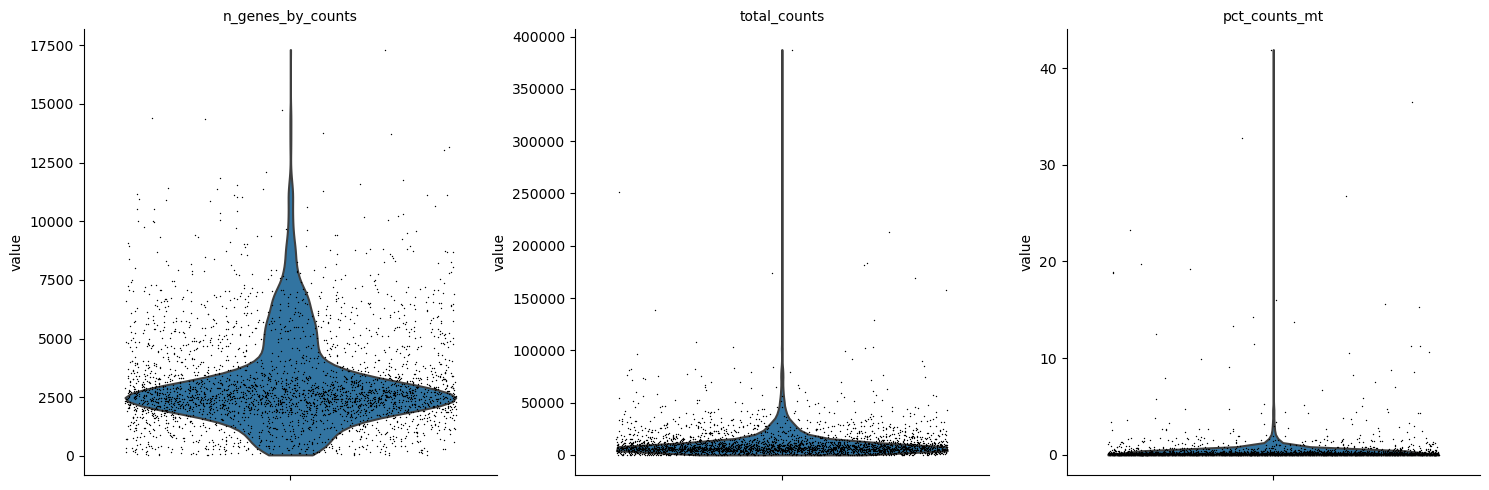

In [8]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [9]:
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 8000))
mu.pp.filter_obs(rna, 'total_counts', lambda x: x < 40000)
mu.pp.filter_obs(rna, 'pct_counts_mt', lambda x: x < 2)

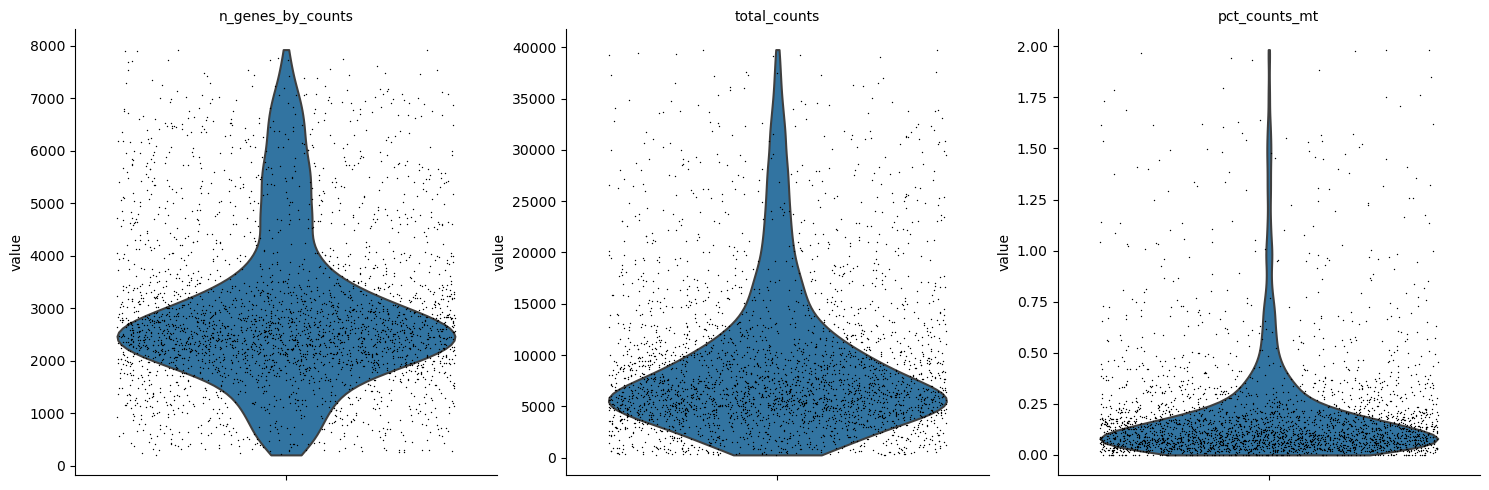

In [10]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

## Scaling and normalization

In [11]:
rna.layers["counts"] = rna.X.copy()
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)
# rna.raw = rna
rna.layers["lognorm"] = rna.X.copy()

## Identify highly-variable genes

In [12]:
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5)

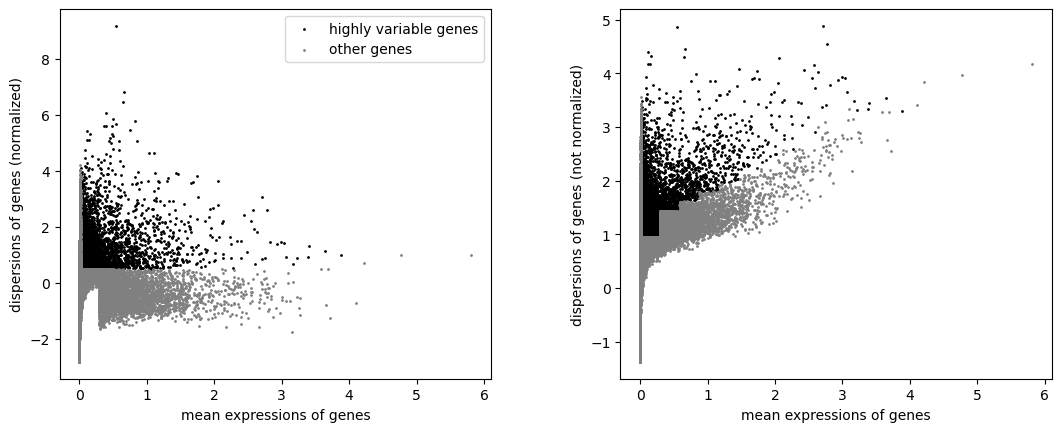

In [13]:
sc.pl.highly_variable_genes(rna)

In [14]:
sc.pp.scale(rna, max_value=10)

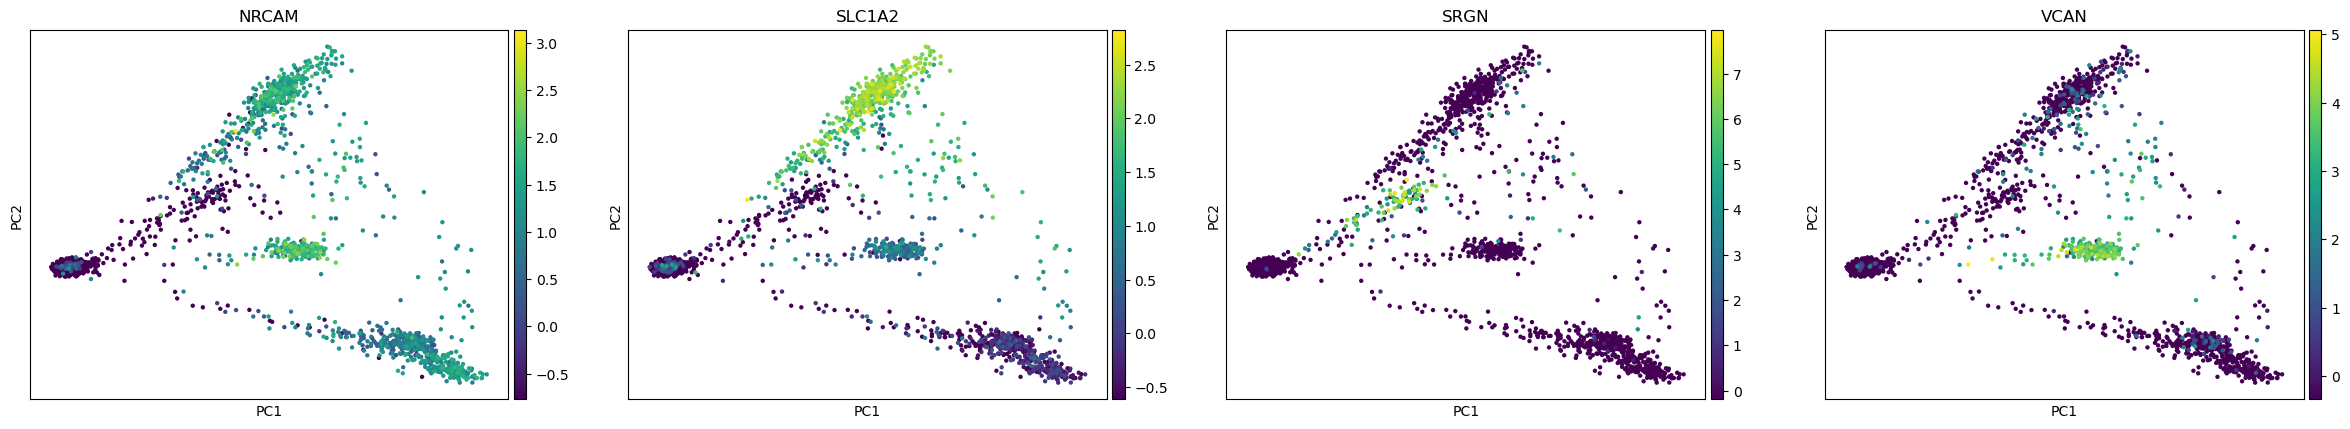

In [15]:
sc.tl.pca(rna, svd_solver='arpack')
sc.pl.pca(rna, color=['NRCAM', 'SLC1A2', 'SRGN', 'VCAN'])

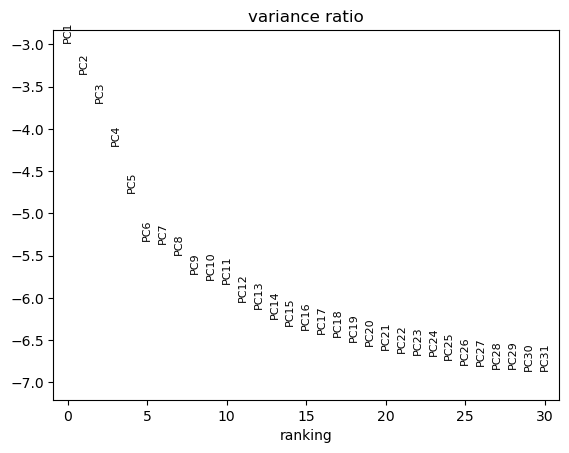

In [16]:
sc.pl.pca_variance_ratio(rna, log=True)

In [17]:
sc.pp.neighbors(rna, n_neighbors=10, n_pcs=20)
sc.tl.leiden(rna, resolution=.5)

/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


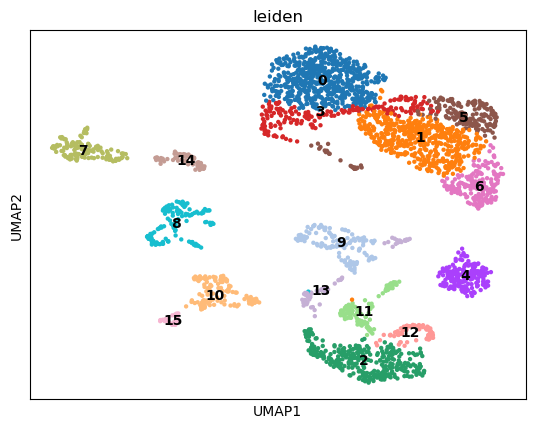

In [18]:
sc.tl.umap(rna, spread=1., min_dist=.5, random_state=11)
sc.pl.umap(rna, color="leiden", legend_loc="on data")

## Cell type annotation

In [19]:
sc.tl.rank_genes_groups(rna, 'leiden', method='t-test')

/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib

In [20]:
result = rna.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.set_option('display.max_columns', 50)
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p,8_n,8_p,9_n,9_p,10_n,10_p,11_n,11_p,12_n,12_p,13_n,13_p,14_n,14_p,15_n,15_p
0,PLP1,0.000000e+00,CTNNA3,0.000000e+00,SLC1A2,0.000000e+00,CTNNA3,1.386847e-229,PCDH15,2.652644e-260,CTNNA3,3.905330e-260,MALAT1,7.906135e-50,KCNIP4,0.000000e+00,DLGAP1,8.963566e-194,LRMDA,6.608572e-69,SNHG14,1.318458e-152,GPC5,4.747626e-143,GPC5,5.962442e-98,PITPNC1,9.111519e-22,SYT1,2.014135e-63,GRIP1,3.853040e-36
1,CNP,0.000000e+00,ST18,3.592953e-291,GPC5,0.000000e+00,MBP,1.444126e-192,DSCAM,2.336696e-305,ST18,2.585290e-194,CTNNA3,1.591178e-39,RBFOX1,0.000000e+00,RBFOX1,2.306675e-165,CD83,4.238996e-53,MYT1L,4.228744e-112,GPM6A,6.184337e-127,ADGRV1,5.959753e-80,SORBS1,2.769325e-21,RIMS2,1.193609e-67,KAZN,1.975049e-45
2,CRYAB,5.818068e-309,IL1RAPL1,2.070258e-294,GPM6A,0.000000e+00,ST18,1.875072e-177,OPCML,0.000000e+00,RNF220,1.075643e-143,HSP90AA1,4.793518e-36,HS6ST3,1.256068e-204,SNHG14,1.267656e-150,ST6GAL1,6.552671e-52,ADARB2,2.600669e-107,SLC1A2,4.501662e-99,CTNNA2,1.628352e-100,ATP1B3,1.189084e-20,RALYL,5.803705e-50,CCSER1,5.615775e-40
3,PTGDS,0.000000e+00,SLC44A1,4.986927e-285,ADGRV1,0.000000e+00,PLP1,1.279525e-126,PTPRZ1,2.238103e-246,DPYD,1.199296e-129,DST,6.047507e-33,CSMD1,0.000000e+00,SYT1,8.597039e-104,SRGAP2,8.299153e-52,KAZN,1.972062e-117,CTNNA2,1.565429e-127,SLC1A2,3.758757e-74,MSI2,2.379704e-20,CSMD1,4.780335e-68,RBFOX1,7.619173e-44
4,DBNDD2,1.037651e-239,PIP4K2A,2.163150e-281,RYR3,2.466260e-295,SLC44A1,3.475296e-155,LHFPL3,2.683399e-174,SLC44A1,7.520263e-175,SLC24A2,3.026886e-23,MEG3,4.656631e-203,PCLO,7.207201e-97,SFMBT2,4.823747e-52,CCSER1,2.340052e-97,SOX5,5.678717e-104,GPM6A,8.016944e-74,MALAT1,6.752891e-19,KALRN,3.398583e-57,RGS7,1.476733e-37
5,MBP,0.000000e+00,DOCK10,2.287142e-277,PITPNC1,0.000000e+00,TMEM144,1.050397e-118,TNR,2.855693e-170,MBP,2.024457e-152,CCDC88A,1.073638e-19,LRRTM4,4.263504e-303,ATRNL1,6.402239e-104,MEF2C,2.862382e-52,FGF14,5.598255e-104,ADGRV1,8.510522e-89,NRG3,4.988985e-98,ZNF331,5.170967e-18,FAM155A,5.268105e-71,ATP8A2,4.490743e-32
6,FTH1,3.202172e-278,RNF220,4.146057e-258,CTNNA2,0.000000e+00,ENPP2,7.824210e-113,LUZP2,1.352114e-163,IL1RAPL1,7.412117e-161,RNF220,5.682518e-20,CHRM3,9.130756e-163,NRG3,6.918291e-163,PLXDC2,1.746137e-53,CHRM3,2.419674e-85,DTNA,6.489832e-107,NRXN1,9.405196e-92,NR4A3,3.365677e-15,NRG3,1.653593e-76,SYT1,5.838566e-34
7,APLP1,1.587117e-243,SIK3,7.518543e-250,LSAMP,0.000000e+00,DPYD,6.395354e-108,KCNIP4,0.000000e+00,NKAIN2,8.749897e-112,IL1RAPL1,6.968710e-21,PHACTR1,1.999672e-227,RIMS2,1.884141e-98,CHST11,5.488205e-50,MEG3,5.315741e-91,NKAIN3,4.128601e-84,SOX5,3.825931e-70,ESYT2,6.388757e-15,LDB2,9.921844e-48,FGF13,4.472785e-28
8,QDPR,1.078225e-240,ELMO1,1.426415e-265,NRXN1,0.000000e+00,MOBP,6.776681e-100,LRRC4C,2.475997e-240,SLC24A2,1.448726e-128,ST18,8.850388e-16,KALRN,2.925946e-186,GRIP1,2.286657e-86,ITPR2,1.985314e-51,GALNTL6,3.329208e-80,NRXN1,7.657986e-115,NTM,3.138094e-90,NR4A2,1.847265e-14,DLGAP2,2.893882e-49,MTUS2,6.490847e-31
9,RNASE1,2.269335e-200,SLC24A2,6.296726e-260,SOX5,0.000000e+00,TMEM165,5.230857e-108,CSMD1,9.004584e-279,PIP4K2A,9.856688e-124,POLR2F,2.904285e-15,SYT1,4.039716e-199,KAZN,8.369727e-100,FRMD4A,4.761944e-51,FRMD4A,1.877699e-95,LINC00299,2.855548e-75,RYR3,3.475680e-60,TLE1,1.991057e-14,GABRB2,3.786100e-50,DAB1,1.382530e-34


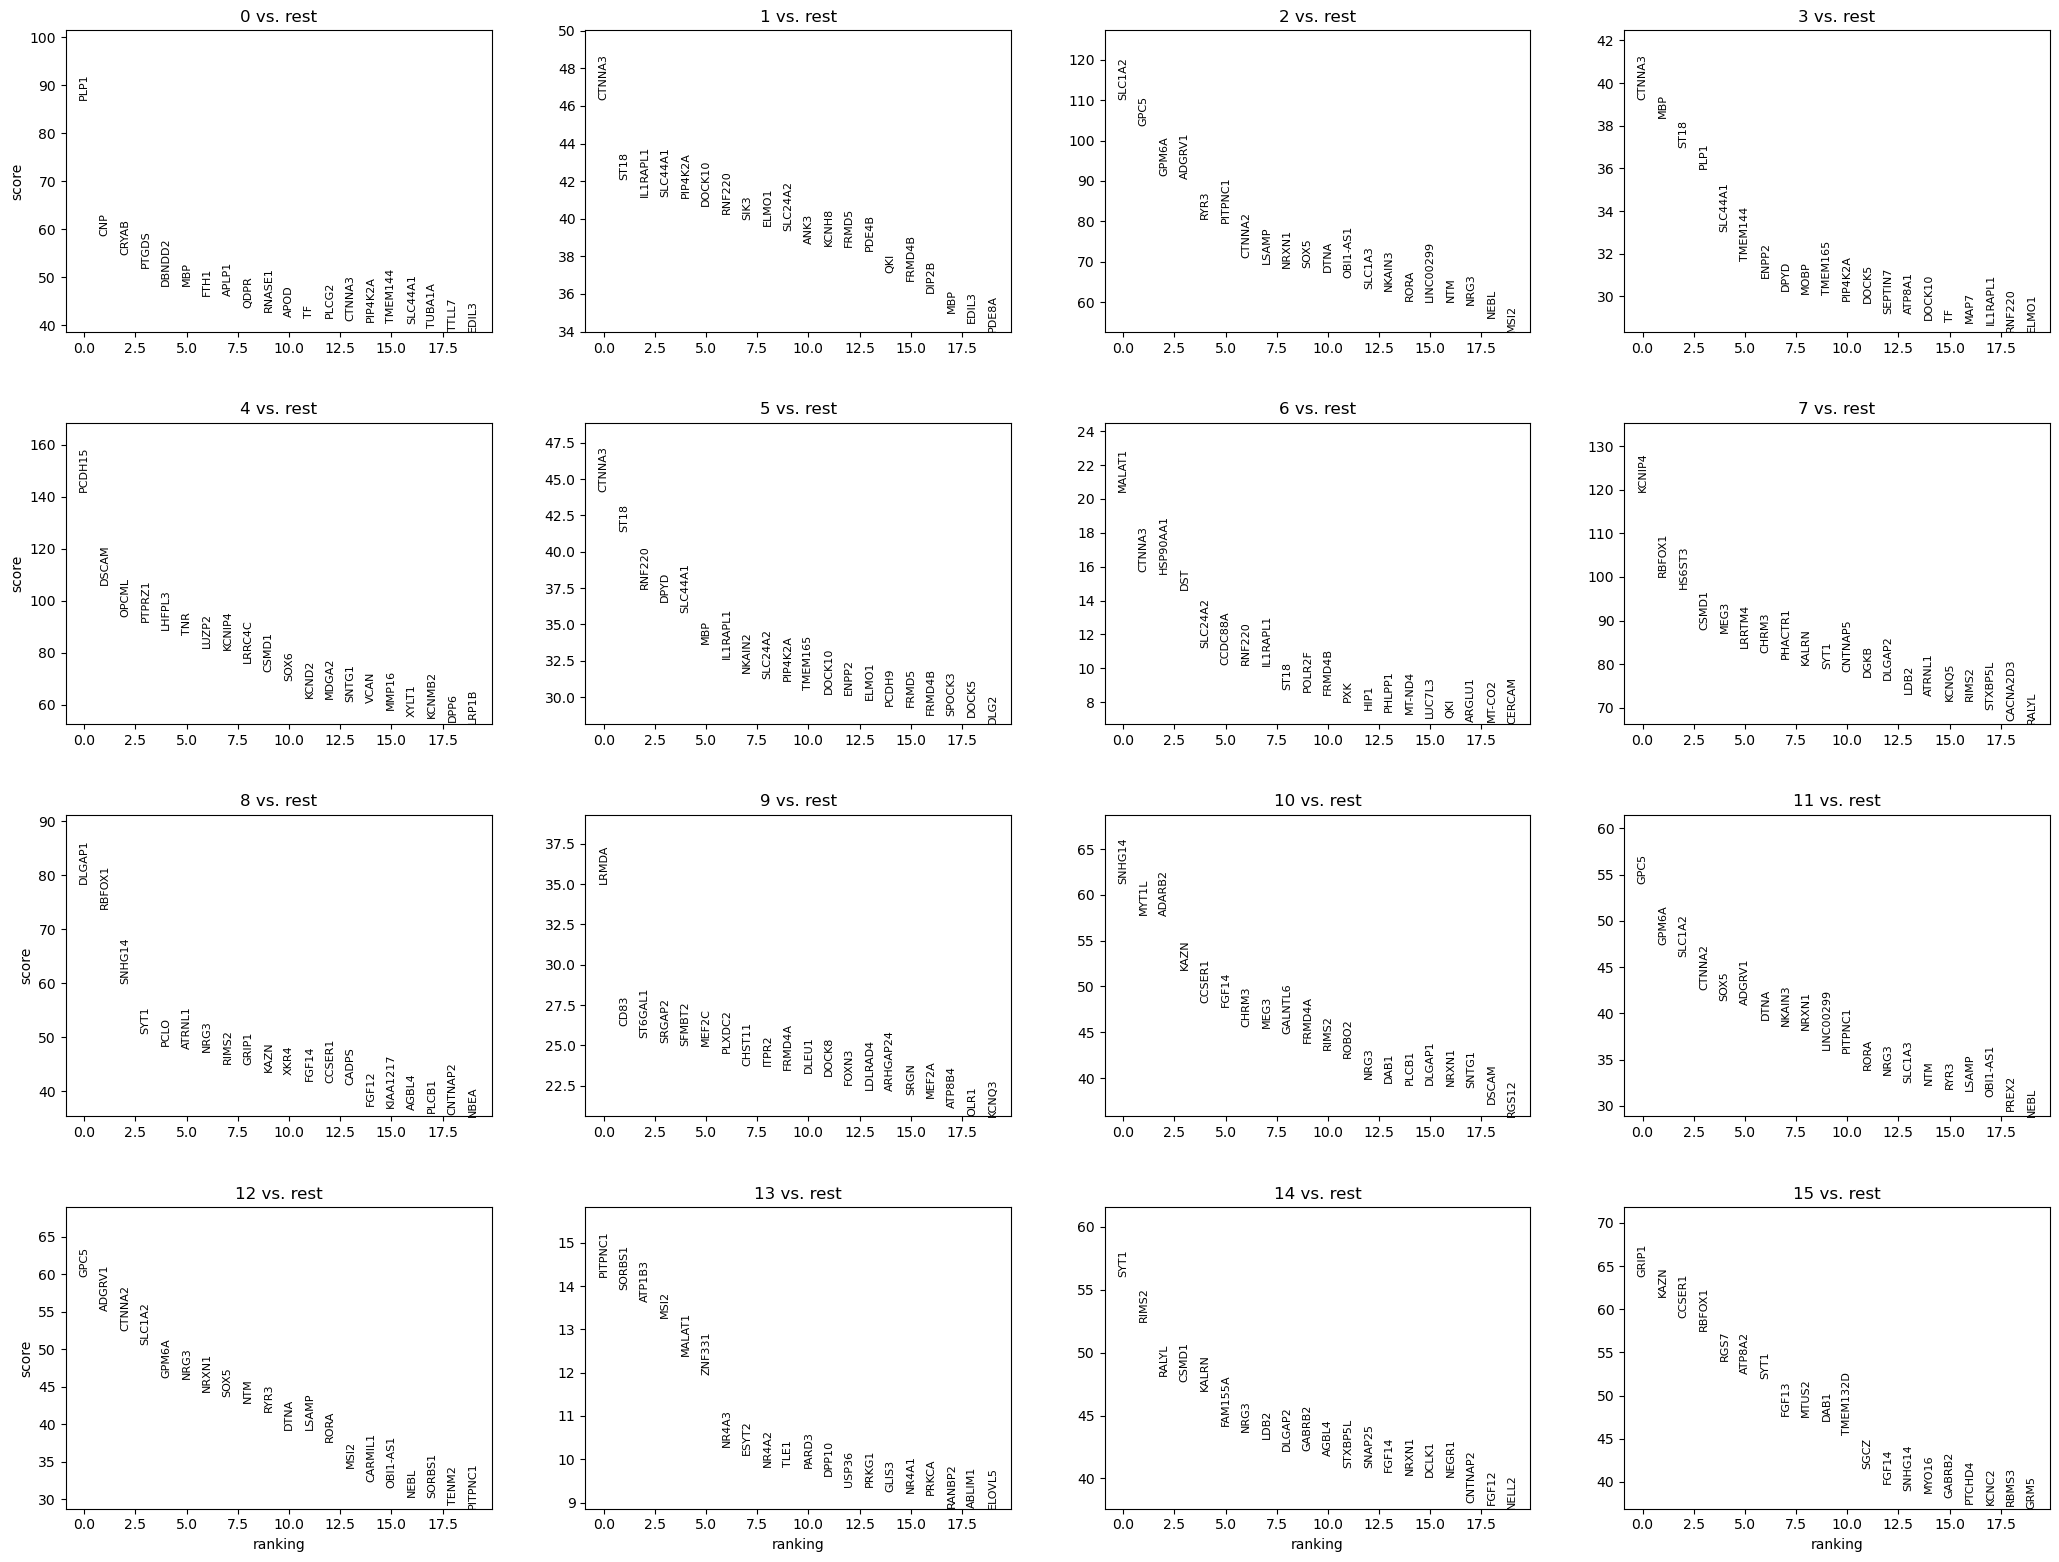

In [21]:
sc.pl.rank_genes_groups(rna, n_genes=20, sharey=False)

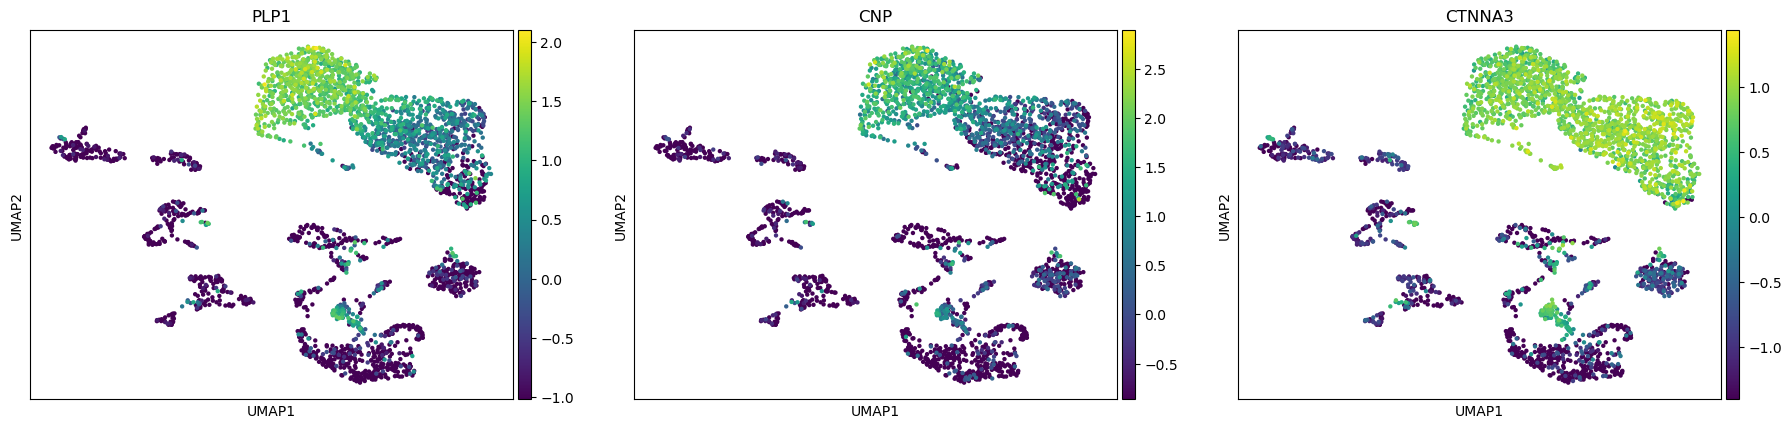

In [22]:
sc.pl.umap(rna, color=["PLP1", "CNP", "CTNNA3"])

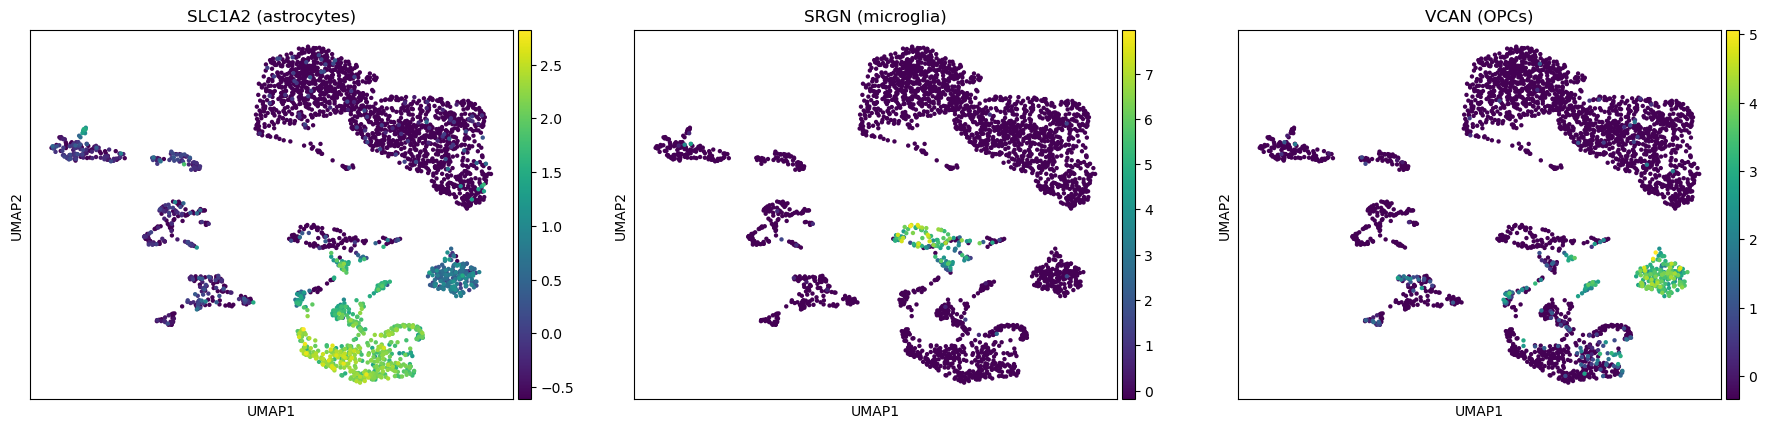

In [23]:
sc.pl.umap(rna, color=["SLC1A2", "SRGN", "VCAN"], title=["SLC1A2 (astrocytes)", "SRGN (microglia)", "VCAN (OPCs)"])

In [24]:
new_cluster_names = {
    "0": "oligodendrocyte",
    "1": "oligodendrocyte",
    "3": "oligodendrocyte",
    "5": "oligodendrocyte",
    "14": "oligodendrocyte",
    "4": "OPC",
    "8": "microglia",
    "2": "astrocyte",
    "10": "astrocyte",
    "11": "astrocyte",
    "12": "astrocyte",
    "6": "excitatory_LAMP5",
    "13": "excitatory_RORB",
    "7": "inhibitory_LHX6",
    "9": "inhibitory_ADARB2",
    "15": "inhibitory_ADARB2",
}

In [25]:
rna.obs['celltype'] = [new_cluster_names[cl] for cl in rna.obs.leiden.astype("str").values]
rna.obs.celltype = rna.obs.celltype.astype("category")

/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


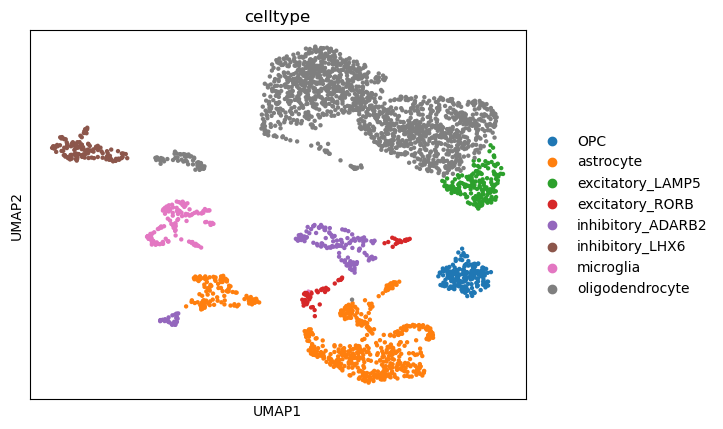

In [26]:
sc.pl.umap(rna, color="celltype")

## 2. ATAC

In [27]:
atac = mdata.mod['atac']

In [28]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

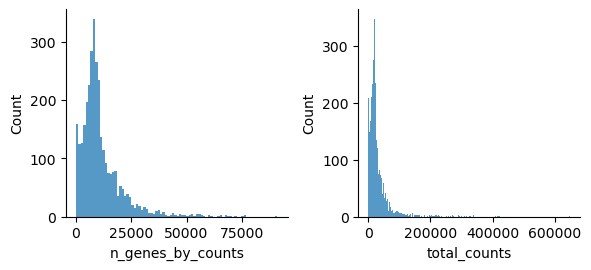

In [29]:
mu.pl.histogram(atac, ['n_genes_by_counts', 'total_counts'], linewidth=0)

In [30]:
mu.pp.filter_var(atac, 'n_cells_by_counts', lambda x: x >= 10)

In [31]:
mu.pp.filter_obs(atac, 'total_counts', lambda x: (x >= 1000) & (x <= 80000))
mu.pp.filter_obs(atac, 'n_genes_by_counts', lambda x: (x >= 100) & (x <= 30000))

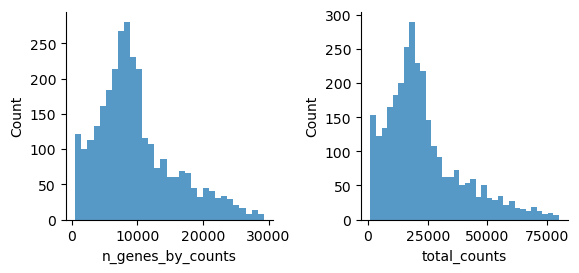

In [32]:
mu.pl.histogram(atac, ['n_genes_by_counts', 'total_counts'], linewidth=0)

In [33]:
# ac.tl.locate_fragments(atac, fragments="/Users/mkeller/mudatasets/brain3k_multiome/atac_fragments.tsv.gz")

Fetching Regions...: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


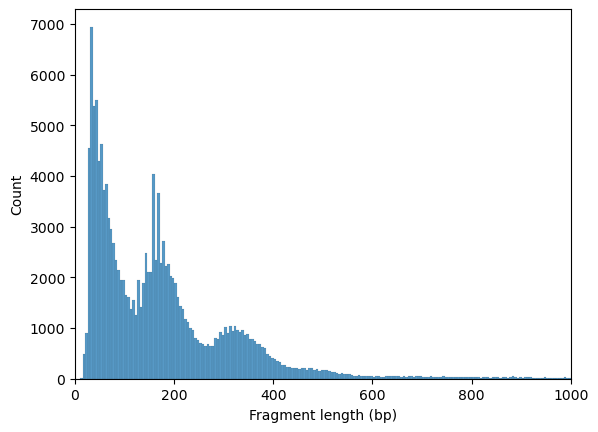

In [34]:
ac.pl.fragment_histogram(atac, region='chr1:1-2000000')

In [35]:
ac.tl.nucleosome_signal(atac, n=1e6)

Reading Fragments: 100%|████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:01<00:00, 644864.63it/s]


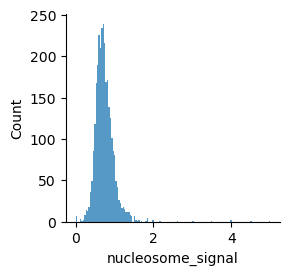

In [36]:
mu.pl.histogram(atac, "nucleosome_signal", linewidth=0)

In [37]:
# Check TSS enrichment
ac.tl.get_gene_annotation_from_rna(mdata['rna']).head(3)  # accepts MuData with 'rna' modality or mdata['rna'] AnnData directly

,Chromosome,Start,End,gene_id,gene_name
MIR1302-2HG,chr1,29553,30267,ENSG00000243485,MIR1302-2HG
FAM138A,chr1,36080,36081,ENSG00000237613,FAM138A
OR4F5,chr1,65418,69055,ENSG00000186092,OR4F5


In [38]:
tss = ac.tl.tss_enrichment(mdata, n_tss=1000)  # by default, features=ac.tl.get_gene_annotation_from_rna(mdata)

Fetching Regions...: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.08it/s]


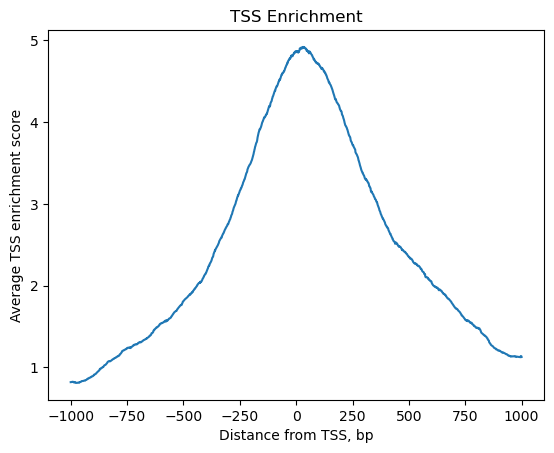

In [39]:
ac.pl.tss_enrichment(tss)

In [40]:
atac.layers["counts"] = atac.X.copy()
sc.pp.normalize_total(atac, target_sum=1e4)
sc.pp.log1p(atac)
atac.layers["lognorm"] = atac.X.copy()

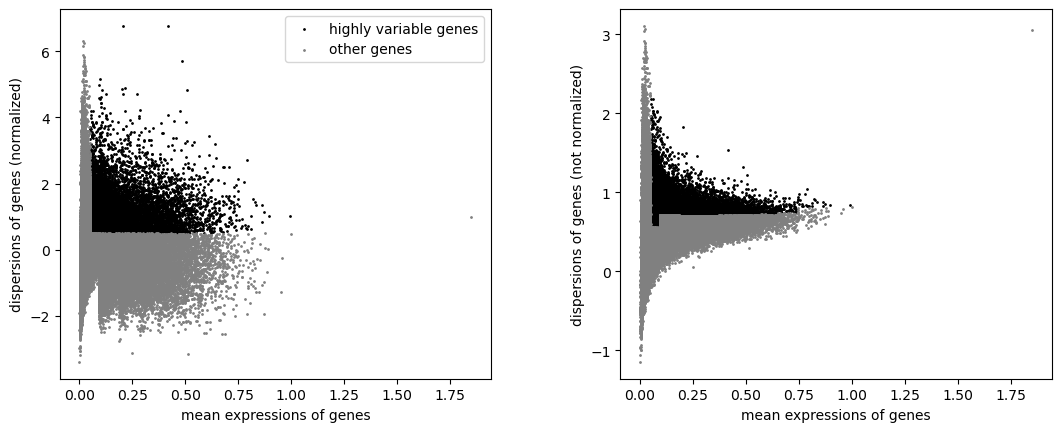

In [41]:
sc.pp.highly_variable_genes(atac, min_mean=0.05, max_mean=1.5, min_disp=.5)
sc.pl.highly_variable_genes(atac)

In [42]:
np.sum(atac.var.highly_variable)

13877

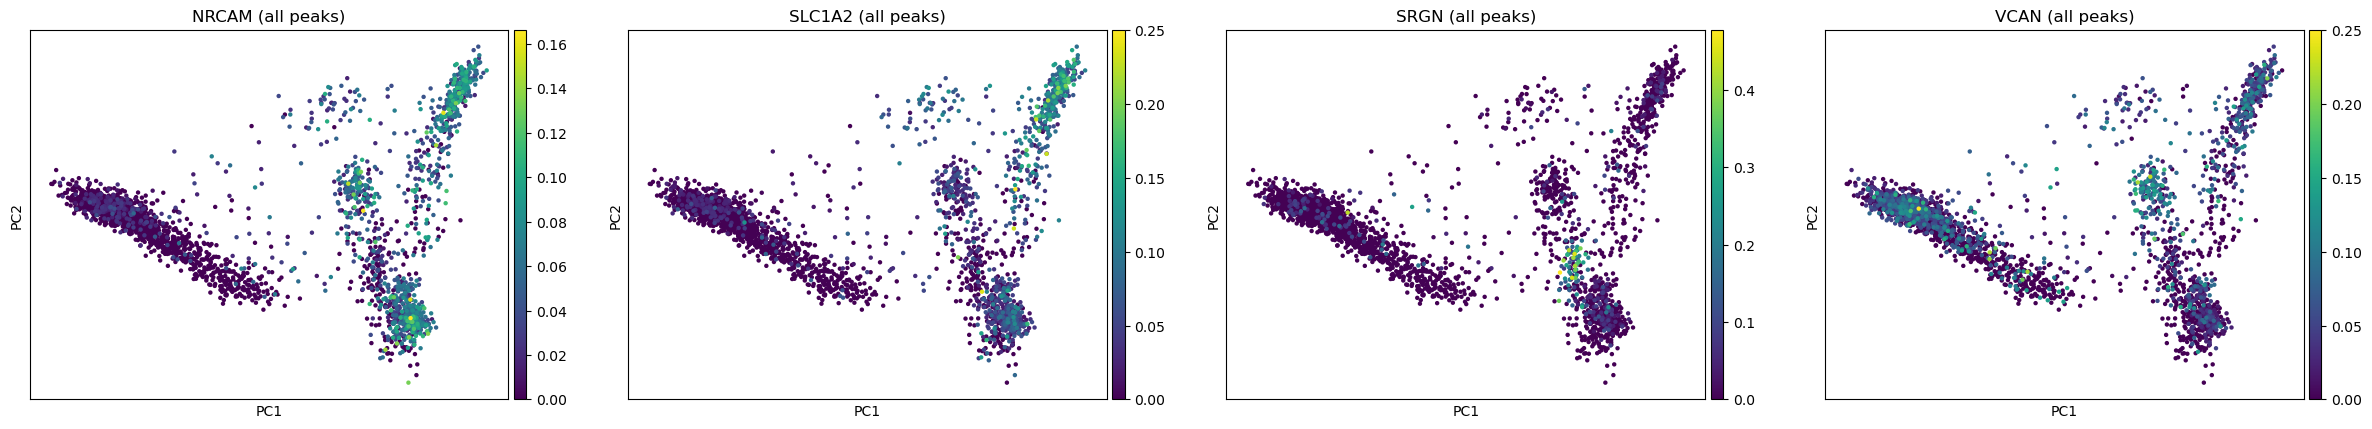

In [43]:
sc.pp.scale(atac, max_value=10)
sc.tl.pca(atac, svd_solver='arpack')
ac.pl.pca(atac, color=['NRCAM', 'SLC1A2', 'SRGN', 'VCAN'], layer='lognorm', func='mean')

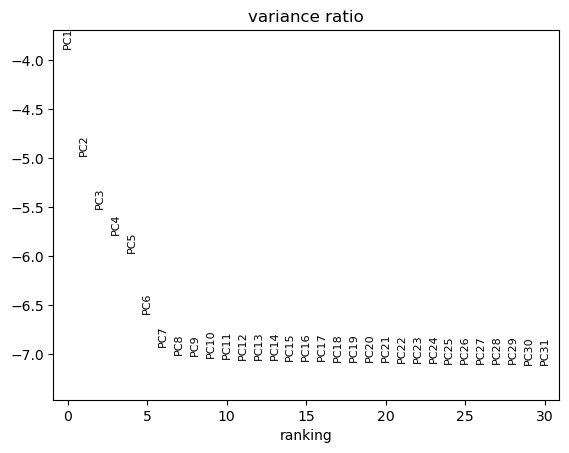

In [44]:
sc.pl.pca_variance_ratio(atac, log=True)

In [45]:
sc.pp.neighbors(atac, n_neighbors=10, n_pcs=20)
sc.tl.leiden(atac, resolution=.5)

/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


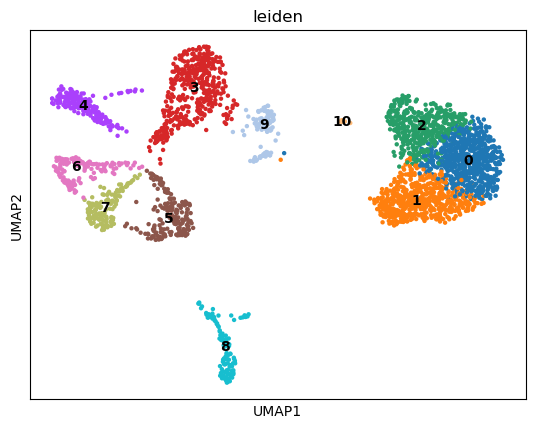

In [46]:
sc.tl.umap(atac, spread=1., min_dist=.5, random_state=11)
sc.pl.umap(atac, color="leiden", legend_loc="on data")

## Marker genes and cell types

In [47]:
ac.tl.rank_peaks_groups(atac, 'leiden', method='t-test')

/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib

In [48]:
result = atac.uns['rank_genes_groups']
groups = result['names'].dtype.names

try:
    pd.set_option("max_columns", 50)
except:
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
    pd.set_option("display.max_columns", 50)

pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'genes', 'pvals']}).head(10)

,0_n,0_g,0_p,1_n,1_g,1_p,2_n,2_g,2_p,3_n,3_g,3_p,4_n,4_g,4_p,5_n,5_g,5_p,6_n,6_g,6_p,7_n,7_g,7_p,8_n,8_g,8_p,9_n,9_g,9_p,10_n,10_g,10_p
0,chr19:10517127-10518023,S1PR5,8.586415e-63,chr1:26555262-26556177,RPS6KA1,1.061353e-07,chr14:19800463-19801343,OR4N2,1.148763e-36,chr15:88954455-88955355,MFGE8,1.909158e-53,chr20:64205357-64206289,MYT1,2.161747e-24,chr3:93470143-93471053,,7.728457e-64,chr2:172102411-172103256,"DLX2, DLX2-DT",2.862112e-17,chr3:93470143-93471053,,2.567446e-32,chr8:141128016-141128911,"DENND3, AC040970.1",2.511727e-16,chr3:93470143-93471053,,3.029055e-10,chr5:5421992-5422922,"ICE1, AC091978.1",5.036902e-08
1,chr9:137025205-137026128,"ABCA2, C9orf139",1.836650e-60,chr2:155733016-155733956,,2.019572e-07,chr7:914026-914890,ADAP1,7.118415e-27,chr11:116113975-116114894,LINC02703,4.379307e-49,chr1:235649644-235650468,GNG4,1.018436e-19,chr19:17830561-17831448,"JAK3, INSL3",1.501875e-26,chr19:17830561-17831448,"JAK3, INSL3",1.785222e-13,chr7:98869781-98870591,TMEM130,4.952732e-17,chr19:16324216-16325125,KLF2,1.639932e-15,chr14:93926839-93927741,"FAM181A, FAM181A-AS1",1.142541e-09,chr3:150762879-150763765,"SIAH2, SIAH2-AS1",3.660542e-05
2,chr17:4533823-4534672,"MYBBP1A, SPNS2",2.234386e-59,chr9:137194149-137195061,"SSNA1, TPRN",2.173635e-07,chr11:61760795-61761661,"MYRF, MYRF-AS1",4.267842e-27,chr17:7667553-7668441,TP53,4.965136e-47,chr7:159144522-159145447,VIPR2,1.325963e-19,chr22:20424868-20425672,SCARF2,1.767269e-23,chr11:43580653-43581568,"MIR670HG, AC068205.1",2.103368e-13,chr6:34465545-34466455,PACSIN1,5.421674e-16,chr19:16896819-16897691,"F2RL3, CPAMD8",1.884857e-14,chr5:90558277-90559161,ADGRV1,1.415188e-09,chr9:4740847-4741719,AK3,1.084190e-05
3,chr5:669160-670066,"TPPP, AC026740.1",3.295060e-54,chr11:67410019-67410923,"CARNS1, TBC1D10C",3.690619e-07,chr9:137021806-137022721,"C9orf139, ABCA2",5.524251e-27,chr2:63050200-63051132,OTX1,7.300666e-46,chr10:115092748-115093673,ATRNL1,1.429046e-19,chr3:6860613-6861507,GRM7,1.402679e-23,chr1:159141445-159142305,CADM3,6.791239e-13,chr20:38723830-38724734,SLC32A1,5.596753e-16,chr19:6730124-6731045,GPR108,3.679240e-14,chr7:153523847-153524661,LINC01287,2.492949e-09,chr6:41712509-41713277,"TFEB, AL035588.1",3.375334e-05
4,chr16:1046313-1047208,AC009041.3,7.043514e-54,chr22:27641917-27642832,AL121885.3,6.282754e-07,chr19:10517127-10518023,S1PR5,4.936794e-27,chr3:93470143-93471053,,6.416216e-48,chr22:37412328-37413244,ELFN2,1.669758e-19,chr3:11136760-11137765,HRH1,1.013443e-22,chr20:63501902-63502698,AL121829.1,7.636812e-13,chr2:172084895-172085680,DLX1,4.264626e-15,chr5:40679337-40680186,"PTGER4, TTC33",9.874328e-14,chr1:19643792-19644718,NBL1,2.635539e-09,chr5:68187291-68188210,LINC02219,8.983458e-05
5,chr1:25563471-25564360,"LDLRAP1, AL606491.1",7.741507e-49,chr9:137025205-137026128,"ABCA2, C9orf139",1.211835e-06,chr9:136978081-136978957,PTGDS,5.333747e-26,chr10:117551948-117552792,EMX2OS,2.072447e-44,chr1:103108243-103109114,COL11A1,3.066915e-19,chr2:96148230-96149146,AC012307.1,1.741706e-21,chr20:38723830-38724734,SLC32A1,1.403797e-12,chr22:43862092-43862988,SULT4A1,8.645234e-15,chr2:8583428-8584334,LINC01814,1.619466e-13,chr12:126742073-126742937,"LINC00943, LINC00944",3.324658e-09,chr17:60599687-60600583,PPM1D,1.355020e-04
6,chr12:131621825-131622683,AC117500.3,2.623733e-44,chr7:28408777-28409685,CREB5,1.636130e-06,chr20:48656406-48657246,"AL035106.1, PREX1",1.506055e-25,chr1:59986377-59987289,CYP2J2,3.596186e-44,chr14:28766242-28767112,FOXG1,1.565355e-18,chr19:42352133-42353032,MEGF8,8.060144e-21,chr10:133336493-133337402,CALY,2.029217e-12,chr2:172102411-172103256,"DLX2, DLX2-DT",1.678817e-14,chr19:48492859-48493838,LMTK3,7.564888e-13,chr22:44668148-44669084,PRR5,4.183188e-09,chr2:241355778-241356651,FARP2,1.397696e-04
7,chr16:19005407-19006339,TMC7,1.188148e-43,chr2:16069783-16070654,GACAT3,2.582533e-06,chr16:19005407-19006339,TMC7,8.755036e-25,chr4:7244199-7245095,SORCS2,7.491149e-44,chr3:119329382-119330238,"ARHGAP31-AS1, ARHGAP31",2.371422e-18,chr7:45407786-45408

In [49]:
mu.pp.filter_obs(atac, "leiden", lambda x: ~x.isin(["9"]))

In [50]:
new_cluster_names = {
    "0": "oligodendrocyte",
    "1": "oligodendrocyte",
    "3": "OPC",
    "7": "microglia",
    "2": "astrocyte",
    "8": "astrocyte",
    "4": "excitatory",
    "5": "inhibitory1",
    "6": "inhibitory2",
    "10": "unk"
}

In [51]:
atac.obs['celltype'] = [new_cluster_names[cl] for cl in atac.obs.leiden.astype("str").values]
atac.obs.celltype = atac.obs.celltype.astype("category")

/Users/mkeller/software/miniconda3/envs/vitessce-figures-env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


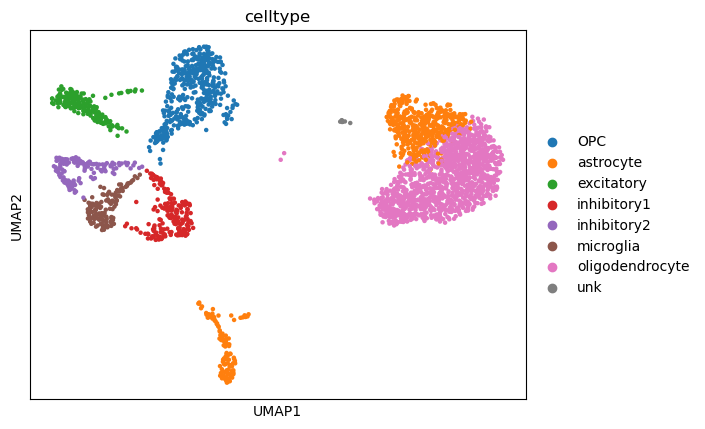

In [52]:
sc.pl.umap(atac, color="celltype")

## 3. Multi-omics integration
Discard cells that are not in both modalities.

In [53]:
mdata.update()

In [54]:
mu.pp.intersect_obs(mdata)

In [56]:
mu.tl.mofa(mdata, n_factors=20, outfile="brain3k_mofa_model.hdf5", gpu_mode=True)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=2747 samples and D=5924 features...
Loaded view='atac' group='group1' with N=2747 samples and D=13877 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [57]:
sc.pp.neighbors(mdata, use_rep="X_mofa")
sc.tl.umap(mdata, random_state=1)

In [58]:
mdata.obsm["X_mofa_umap"] = mdata.obsm["X_umap"]

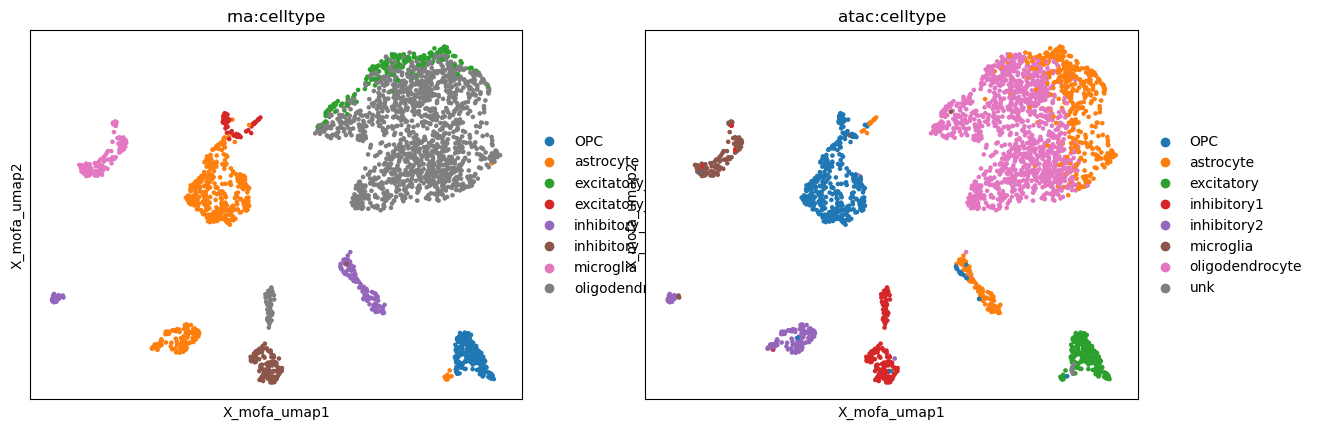

In [59]:
mu.pl.embedding(mdata, basis="X_mofa_umap", color=["rna:celltype", "atac:celltype"])

In [60]:
# Reference: https://github.com/scverse/muon/issues/65
mdata.mod["atac"].uns = {}
mdata.mod["rna"].uns = {}
mdata.uns = {}

In [61]:
rna.var.gene_ids = rna.var.gene_ids.astype("str")
atac.var.gene_ids = atac.var.gene_ids.astype("str")

In [62]:
atac.obsm["X_hvg"] = atac[:, atac.var["highly_variable"]].copy().X
rna.obsm["X_hvg"] = rna[:, rna.var["highly_variable"]].copy().X

In [63]:
mdata.mod["atac"] = optimize_adata(
    atac,
    obs_cols=["leiden", "celltype"],
    obsm_keys=["X_pca", "X_umap", "X_hvg"],
    var_cols=["gene_ids", "feature_types", "genome", "interval", "highly_variable"],
    layer_keys=["counts", "lognorm"]
)
mdata.mod["rna"] = optimize_adata(
    rna,
    obs_cols=["leiden", "celltype"],
    obsm_keys=["X_pca", "X_umap", "X_hvg"],
    var_cols=["gene_ids", "feature_types", "genome", "interval", "highly_variable"],
    layer_keys=["counts", "lognorm"]
)

In [64]:
# Fix issue during writing to zarr - this column contains bool and NaN
mdata.var["rna:mt"] = mdata.var["rna:mt"].astype(str)

In [65]:
# TODO: sort var axis by genome (ATAC) and hierarchical clustering (RNA)

In [66]:
mdata

MuData object with n_obs × n_vars = 2747 × 170629
  var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
  obsm:	'X_mofa', 'X_umap', 'X_mofa_umap'
  varm:	'LFs'
  obsp:	'distances', 'connectivities'
  2 modalities
    rna:	2747 x 36601
      obs:	'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'highly_variable'
      obsm:	'X_pca', 'X_umap', 'X_hvg'
      varm:	'PCs'
      layers:	'counts', 'lognorm'
    atac:	2747 x 134028
      obs:	'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'highly_variable'
      obsm:	'X_pca', 'X_umap', 'X_hvg'
      varm:	'PCs'
      layers:	'counts', 'lognorm'

In [67]:
mdata.write_zarr(join(BASE_DIR, "brain3k_processed.mdata.zarr"))

## Configure visualization

In [68]:
from mudata import read_zarr
from os.path import join
mdata = read_zarr(join(BASE_DIR, "brain3k_processed.mdata.zarr"))

In [69]:
!pwd

/Users/mkeller/research/dbmi/vitessce/paper-figures/multiome/src


In [70]:
multivec_zarr = join(BASE_DIR, "brain3k.multivec.zarr")

In [71]:
adata_to_multivec_zarr(mdata.mod["atac"], multivec_zarr, obs_set_col="celltype", obs_set_name="Cell Type", layer_key="lognorm")

In [72]:
from vitessce import (
    VitessceConfig,
    ViewType as vt,
    CoordinationType as ct,
    FileType as ft,
    AnnDataWrapper,
    MultivecZarrWrapper,
    BASE_URL_PLACEHOLDER
)
import json
from os.path import join

In [73]:
vc = VitessceConfig(schema_version="1.0.15", name='Multiome data', description='RNA+ATAC', base_dir=BASE_DIR)

In [74]:
rna_zarr = join("brain3k_processed.mdata.zarr", "mod", "rna")
atac_zarr = join("brain3k_processed.mdata.zarr", "mod", "atac")
joint_zarr = "brain3k_processed.mdata.zarr"
multivec_zarr = join("brain3k.multivec.zarr")

In [75]:
dataset = vc.add_dataset(name='RNA+ATAC').add_object(AnnDataWrapper(
    # We run add_object with adata_path=rna_zarr first to add the cell-by-gene matrix and associated metadata.
    adata_path=rna_zarr,
    obs_embedding_paths=["obsm/X_umap"],
    obs_embedding_names=["UMAP"],
    obs_set_paths=["obs/celltype"],
    obs_set_names=["Cell Type"],
    obs_feature_matrix_path="obsm/X_hvg",
    feature_filter_path="var/highly_variable",
    # To be explicit that the features represent genes and gene expression, we specify that here.
    coordination_values={
        "featureType": "gene",
        "featureValueType": "expression"
    }
)).add_object(AnnDataWrapper(
    # We next run add_object with adata_path=adt_zarr to add the cell-by-ADT matrix and associated metadata.
    adata_path=atac_zarr,
    obs_embedding_paths=["obsm/X_umap"],
    obs_embedding_names=["UMAP"],
    obs_set_paths=["obs/celltype"],
    obs_set_names=["Cell Type"],
    obs_feature_matrix_path="obsm/X_hvg",
    feature_filter_path="var/highly_variable",
    # If the features do not represent genes and gene expression, we specify alternate values here.
    coordination_values={
        "featureType": "peak",
        "featureValueType": "count"
    }
)).add_object(MultivecZarrWrapper(
    # We next run add_object with adata_path=adt_zarr to add the cell-by-ADT matrix and associated metadata.
    zarr_path=multivec_zarr,
))

In [76]:
# TODO: add more views to showcase the multiome data
"""
genomic_profiles = vc.add_view(vt.GENOMIC_PROFILES, dataset=dataset)
scatter = vc.add_view(vt.SCATTERPLOT, dataset=dataset, mapping = "UMAP")
cell_sets = vc.add_view(vt.OBS_SETS, dataset=dataset)

vc.layout(genomic_profiles / (scatter | cell_sets));
"""

'\ngenomic_profiles = vc.add_view(vt.GENOMIC_PROFILES, dataset=dataset)\nscatter = vc.add_view(vt.SCATTERPLOT, dataset=dataset, mapping = "UMAP")\ncell_sets = vc.add_view(vt.OBS_SETS, dataset=dataset)\n\nvc.layout(genomic_profiles / (scatter | cell_sets));\n'

In [77]:
umap_scatterplot_by_rna = vc.add_view(vt.SCATTERPLOT, dataset=dataset, mapping="UMAP")
umap_scatterplot_by_atac = vc.add_view(vt.SCATTERPLOT, dataset=dataset, mapping="UMAP")

gene_list = vc.add_view(vt.FEATURE_LIST, dataset=dataset)
peak_list = vc.add_view(vt.FEATURE_LIST, dataset=dataset)

rna_heatmap = vc.add_view(vt.HEATMAP, dataset=dataset).set_props(transpose=False)
#atac_heatmap = vc.add_view(vt.HEATMAP, dataset=dataset).set_props(transpose=False)
genomic_profiles = vc.add_view(vt.GENOMIC_PROFILES, dataset=dataset)

In [78]:
# We need to specify which of the two features (i.e., genes or tags) the different plots correspond to.
# We also need to make sure the selection of genes and tags are scoped to only the corresponding plots,
# and we want to make sure the color mappings are independent for each modality.
coordination_types = [ct.FEATURE_TYPE, ct.FEATURE_VALUE_TYPE, ct.FEATURE_SELECTION, ct.OBS_COLOR_ENCODING, ct.FEATURE_VALUE_COLORMAP_RANGE]
vc.link_views([umap_scatterplot_by_rna, gene_list, rna_heatmap], coordination_types, ["gene", "expression", None, 'cellSetSelection', [0.0, 0.3]])
vc.link_views([umap_scatterplot_by_atac, peak_list], coordination_types, ["peak", "count", None, 'cellSetSelection', [0.0, 1.0]])

# We can link the two scatterplots on their zoom level and (X,Y) center point so that zooming/panning is coordinated.
vc.link_views([umap_scatterplot_by_rna, umap_scatterplot_by_atac], [ct.EMBEDDING_ZOOM, ct.EMBEDDING_TARGET_X, ct.EMBEDDING_TARGET_Y], [3, 0, 0])

In [79]:
vc.link_views([umap_scatterplot_by_rna, gene_list, rna_heatmap], [ct.FEATURE_SELECTION], [["SMARCA4"]])

vc.link_views([umap_scatterplot_by_rna, umap_scatterplot_by_atac], [ct.EMBEDDING_OBS_SET_LABELS_VISIBLE], [True])
vc.link_views([genomic_profiles], [ct.GENOMIC_TARGET_X, ct.GENOMIC_TARGET_Y, ct.GENOMIC_ZOOM_X], [2665412779, 834360634, 13.8699])

In [80]:
# We define a layout for the plots using two rows.
# In the first row, we add the three gene-related visualizations,
# and in the second row, we add the three ADT-related visualizations.
vc.layout(
    (rna_heatmap | (umap_scatterplot_by_rna | gene_list))
    / (genomic_profiles | (umap_scatterplot_by_atac | peak_list))
);

In [81]:
#vw = vc.widget()
#vw

In [82]:
vc.web_app()

'http://vitessce.io/#?theme=light&url=data:,%7B%22version%22%3A+%221.0.15%22%2C+%22name%22%3A+%22Multiome+data%22%2C+%22description%22%3A+%22RNA%2BATAC%22%2C+%22datasets%22%3A+%5B%7B%22uid%22%3A+%22A%22%2C+%22name%22%3A+%22RNA%2BATAC%22%2C+%22files%22%3A+%5B%7B%22fileType%22%3A+%22anndata.zarr%22%2C+%22url%22%3A+%22http%3A%2F%2Flocalhost%3A8003%2Fbrain3k_processed.mdata.zarr%2Fmod%2Frna%22%2C+%22options%22%3A+%7B%22obsEmbedding%22%3A+%5B%7B%22path%22%3A+%22obsm%2FX_umap%22%2C+%22dims%22%3A+%5B0%2C+1%5D%2C+%22embeddingType%22%3A+%22UMAP%22%7D%5D%2C+%22obsSets%22%3A+%5B%7B%22name%22%3A+%22Cell+Type%22%2C+%22path%22%3A+%22obs%2Fcelltype%22%7D%5D%2C+%22obsFeatureMatrix%22%3A+%7B%22path%22%3A+%22obsm%2FX_hvg%22%2C+%22featureFilterPath%22%3A+%22var%2Fhighly_variable%22%7D%7D%2C+%22coordinationValues%22%3A+%7B%22featureType%22%3A+%22gene%22%2C+%22featureValueType%22%3A+%22expression%22%7D%7D%2C+%7B%22fileType%22%3A+%22anndata.zarr%22%2C+%22url%22%3A+%22http%3A%2F%2Flocalhost%3A8003%2Fbrain3k_

In [83]:
os.makedirs(VIGNETTE_DIR, exist_ok=True)

In [84]:
GCLOUD_BASE_URL="https://storage.googleapis.com/vitessce-demo-data/paper-figures-august-2023"

In [85]:
config_dict = vc.to_dict(base_url=GCLOUD_BASE_URL)

# Use `open` to create a new empty file at ./exported_data/vitessce.json
with open(join(VIGNETTE_DIR, "multiome.json"), "w") as f:
    json.dump(config_dict, f)


In [86]:
vignette_md = """---
name: Use Case 6
figures:
    - name: "Visualization"
      file: multiome.json
---

## Transcriptomics and chromatin accessibility in single cells from the human cerebellum

This dataset is provided by 10x Genomics as a demo of the Multiome technology and thus is not intended to answer a particular biological question. Nonetheless, it can be used to validate that the expected cerebellum cell types are present. Using the heatmap, we can identify the gene SYT1 based on its expression pattern in the cell cluster corresponding to the microglia cell type. Querying for transcription factors of SYT1 using Cistrome Toolkit (Liu et al., Genome Biology 2011; Zheng et al., Nucleic Acids Research 2019), we can identify SMARCA4 as the top result from a human neuron sample, with a regulatory potential score of 0.50982. Navigating to this gene on chromosome 19 in the genome browser view, we can observe a footprint-like pattern in the track for microglia, which we might want to validate in follow-up analyses.
"""

with open(join(VIGNETTE_DIR, "description.md"), "w") as f:
    f.write(vignette_md)
